#ABSTRACTO
##En el sendero de minimizar las emisiones de gases que generan cambio climático, se analiza un dataset elaborado para fabricantes de vehículo en Canadá. El mismo toma mediciones de las emisiones de CO2 que genera un vehiculo dependiendo de las partes mecanicas y consumos que se analicen. 
##De ese dataset nos surge la pregunta:
##Que variables (accionamientos mecanicos, consumos)  generan mas emisiones de CO2 en vehiculos?. Estudio realizado en canada y bajado de https://www.kaggle.com/.
## https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

#INTRODUCCION

##**Contexto comercial**. Analizar que impacta más en la generación de emiosiones de CO2 respecto de la mecánica del vehiculo y poder predecir en función de los resultado donde mejorar la tecnología del vehículo para reducir las emisiones.

##**Problema comercial**. Crear un modelo que pueda predecir en funcion de los datos medidos donde se pueden hacer las mejoras en las partes de accionamiento mecánico del vehículo y así según que parte mecánica del vehiculo sea (tamañano motor, cilindrada, etc) como podría impactar en el costo del mismo. 

##**Contexto analítico**. Los datos residen en un archivo CSV que se bajó de kaggle.com. A lo largo del caso, estará iterando en su modelo inicial muchas veces. Se utilizará el paquete statsmodels de Python para crear y analizar estos modelos lineales. Los datos son de algunas marcas del mercado que se comercializan en canadá. 


In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
! pip install chart_studio
! pip install bqplot
! pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 8.8 MB/s 
     |████████████████████████████████| 1.6 MB 43.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 8.4 MB/s 
     |████████████████████████████████| 9.9 MB 52.4 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196208 sha256=449c307feec6ba5946dafc1aeaad6042d1a8ebbb24cc3247aea516b439e70a36
  Stored in directory: /root/.cache/pip/wheels/75/b0/89/f6866fc5accea9bec04f4c9f2a242520d6e8e7b8fcf89e139c
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=3134463f1ca09c90de4419e2d808dd1d9db71a6dac4e39375a2429eef0ab0

In [3]:
%cd '/content/gdrive/MyDrive/Data science/Data_Science/Proyecto Final'

/content/gdrive/MyDrive/Data science/Data_Science/Proyecto Final


In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import chart_studio.plotly  as py
from   scipy import stats
%matplotlib inline
plt.style.use('ggplot')
import pingouin

#Carga de base de datos a analizar

In [5]:
df= pd.read_excel('/content/gdrive/MyDrive/Data science/Data_Science/Proyecto Final/CO2 Emissions_Canada_Vehiculos.xlsx')
df.head().round(1)

,Make,Model,Vehicle_Class,Engine_Size_(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_(L/100 km),Fuel_Consumption_Hwy_(L/100 km),Fuel_Consumption_Comb_(L/100 km),Fuel_Consumption_Comb_(mpg),CO2_Emissions_(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.shape

(7385, 12)

Inspeccionamos tipos de datos

In [7]:
df.dtypes

Make                                 object
Model                                object
Vehicle_Class                        object
Engine_Size_(L)                     float64
Cylinders                             int64
Transmission                         object
Fuel_Type                            object
Fuel_Consumption_City_(L/100 km)    float64
Fuel_Consumption_Hwy_(L/100 km)     float64
Fuel_Consumption_Comb_(L/100 km)    float64
Fuel_Consumption_Comb_(mpg)           int64
CO2_Emissions_(g/km)                  int64
dtype: object

Chequeamos columnas y titulos

In [8]:
df.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size_(L)', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City_(L/100 km)',
       'Fuel_Consumption_Hwy_(L/100 km)', 'Fuel_Consumption_Comb_(L/100 km)',
       'Fuel_Consumption_Comb_(mpg)', 'CO2_Emissions_(g/km)'],
      dtype='object')

**Las variables disponibles son:**


*   Make: Frabicante del vahiculo
*   Model: Modelo del vehiculo
*   Vehicle_Class: Tipo o clase de vehículo
*   Engine_Size_(L):Capacidad del motor
*   Cylinders: cantidad de cilindros o cilindrada
*   Transmission: tipo de caja de cambios
*   Fuel_Type: tipo de combustible
      X = Regular gasoline, Z = Premium gasoline, D = Diesel, 
      E = Ethanol (E85), N = Natural gas
*   Fuel_Consumption_City_(L/100 km): Consumo de combustible en ciudad
*   Fuel_Consumption_Hwy_(L/100 km): Consumo de combustible en autopista
*   Fuel_Consumption_Comb_(L/100 km): Consumo de combustible combinado
*   Fuel_Consumption_Comb_(mpg): Consumo de combustible en millas por galón
*   CO2_Emissions_(g/km): Emision de CO2





#Ingenieria de Factores
Analizamos Integridad

**Analizamos nulos**

**No hay nulos! **

In [9]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle_Class                       0
Engine_Size_(L)                     0
Cylinders                           0
Transmission                        0
Fuel_Type                           0
Fuel_Consumption_City_(L/100 km)    0
Fuel_Consumption_Hwy_(L/100 km)     0
Fuel_Consumption_Comb_(L/100 km)    0
Fuel_Consumption_Comb_(mpg)         0
CO2_Emissions_(g/km)                0
dtype: int64

**Variables que se pueden remover:** 
Se observa que hay dos variables Fuel_Consumption_Comb. Están en disitintas unidades e informan lo mismo, es redundante que estén las dos, el sistema no reconoce que están en distintas unidades pero dicen lo mismo, genera ruido que estén las dos, vamos a eliminar  del dataset: Fuel_Consumption_Comb_(mpg).

In [10]:
df=df.drop(columns=['Fuel_Consumption_Comb_(mpg)'])
df.head()

,Make,Model,Vehicle_Class,Engine_Size_(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_(L/100 km),Fuel_Consumption_Hwy_(L/100 km),Fuel_Consumption_Comb_(L/100 km),CO2_Emissions_(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [11]:
df.shape

(7385, 11)

**Análisis de duplicados**

In [12]:
df=df.drop_duplicates()
df.shape

(6282, 11)

**Se eliminaron 1103 duplicados.**

#EDA.

Generamos un df 'make' que relaciona el fabricante con la  generación de emisiones CO2.

In [13]:
make = df[['Make','CO2_Emissions_(g/km)']].groupby(by=['Make']).sum()
make.head()

,CO2_Emissions_(g/km)
Make,
ACURA,11305
ALFA ROMEO,4395
ASTON MARTIN,13427
AUDI,66454
BENTLEY,12877


In [14]:
make.shape

(42, 1)

Text(0.5, 0, 'Marca de Vahículo')

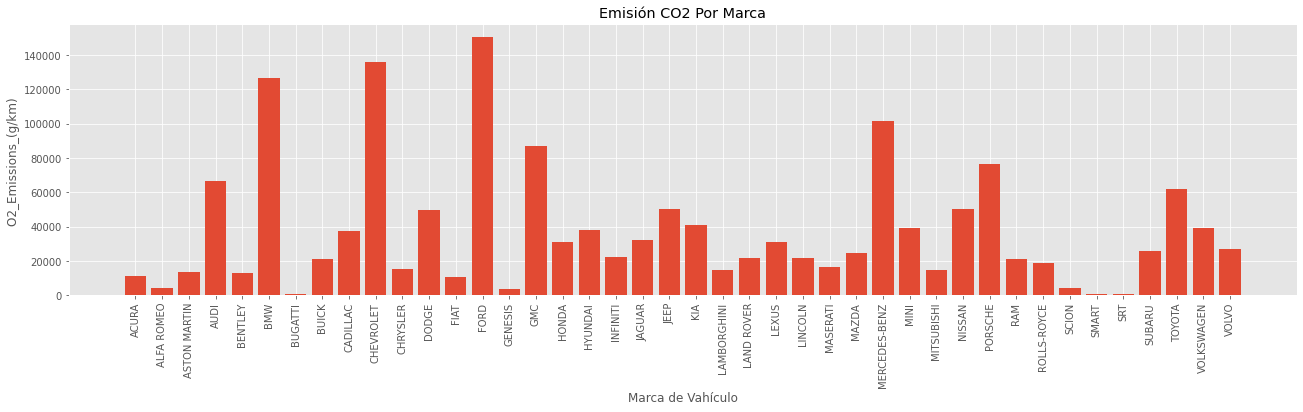

In [15]:
fig, ax = plt.subplots(figsize=(22,5))
plt.xticks(rotation=90)
ax.bar(make.index,make['CO2_Emissions_(g/km)'])
ax.set_title('Emisión CO2 Por Marca')
ax.set_ylabel('O2_Emissions_(g/km) ')
ax.set_xlabel('Marca de Vahículo')

Se ve una marcada diferencia en la emisión de CO2 según la marca de los vehículos. De todos modos no es una visualización representativa de lo que buscamos ya que es la suma las emisiones de todos los modelos y clases de vehiculos de cada marca y hay marcas con más modelos y tipos que otras.

Vamos a realizarlo con un promedio que puede ser mas representativo

Text(0.5, 0, 'Marca de Vahículo')

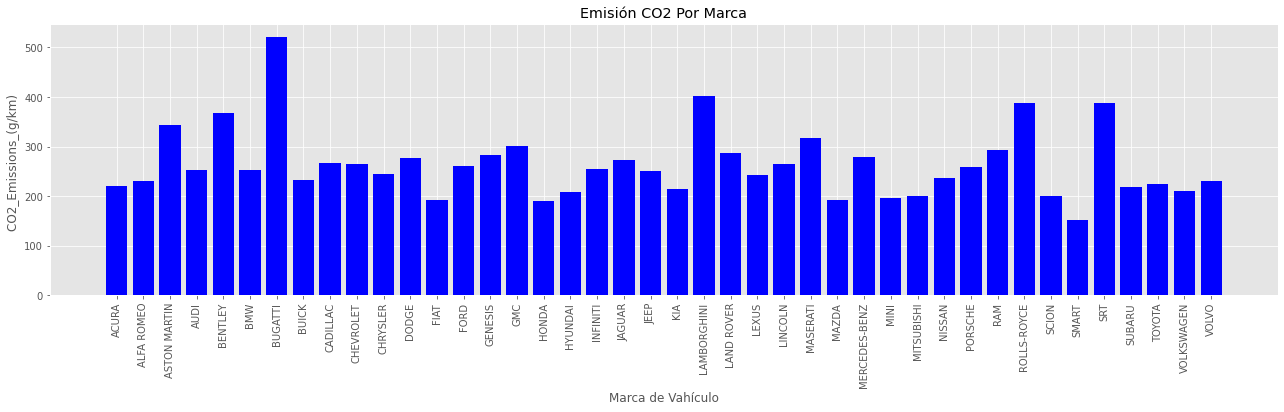

In [16]:
make_m = df[['Make','CO2_Emissions_(g/km)']].groupby(by=['Make']).mean()
#make_m.head()
fig, ax = plt.subplots(figsize=(22,5))
plt.xticks(rotation=90)
ax.bar(make_m.index,make_m['CO2_Emissions_(g/km)'],color='b')
ax.set_title('Emisión CO2 Por Marca')
ax.set_ylabel('CO2_Emissions_(g/km) ')
ax.set_xlabel('Marca de Vahículo')

Se observa una distribución más pareja. Cambian los que más emiten. En el gráfico anterior era FORD el más emisor y ahora está en le promedio. Bugatti pasó a ser el mayor emisor de CO2.

A continuación trataremos de realizar visualizaciones por marcas, modelos y clase de vehículos en relación de la emisiones de CO2.

In [17]:
make1 = df[['Make','Model','CO2_Emissions_(g/km)']].groupby(by=['Make','Model']).sum()
make1.head()

CO2_Emissions_(g/km)
Make  Model                               
ACURA ILX                             1402
      ILX HYBRID                       276
      MDX 4WD                          255
      MDX HYBRID AWD                   210
      MDX Hybrid AWD                   210

In [18]:
make1.shape

(2053, 1)

Se ve que tenemos demasiadas marcas y modelos para graficar barras o pie_chart.

Vamos a seleccionar por Vehicle_Class para ver si podemos realizar visualizaciones que sean legibles.
Generamos df make2



In [19]:
make2 = df[['Make','Vehicle_Class','CO2_Emissions_(g/km)']].groupby(by=['Make','Vehicle_Class']).sum()
make2.head()

CO2_Emissions_(g/km)
Make       Vehicle_Class                      
ACURA      COMPACT                        4719
           MID-SIZE                       2158
           SUV - SMALL                    4167
           TWO-SEATER                      261
ALFA ROMEO MID-SIZE                       1675

In [20]:
make2.shape

(231, 1)

In [21]:
Acura=make2.loc['ACURA']
Acura

,CO2_Emissions_(g/km)
Vehicle_Class,
COMPACT,4719
MID-SIZE,2158
SUV - SMALL,4167
TWO-SEATER,261


In [22]:
Acura.shape

(4, 1)

Ahora si podemos realizar visualizaciones mas legibles sin amontonamiento de textos en el eje x
Realizaremos para 3 marcas de vehículos y sus respectivas vehicles_Class

Primer grafico para ACURA

Text(0.5, 0, 'Clase de Vehículo')

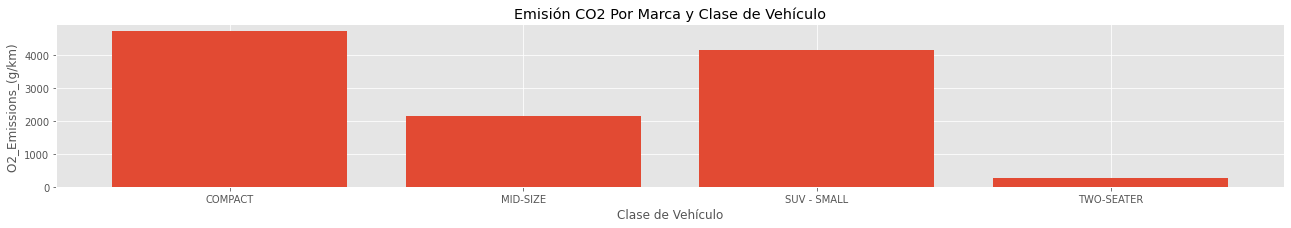

In [23]:
fig1, ax = plt.subplots(figsize=(22,3))
ax.bar(Acura.index,Acura['CO2_Emissions_(g/km)'])
ax.set_title('Emisión CO2 Por Marca y Clase de Vehículo')
ax.set_ylabel('O2_Emissions_(g/km) ')
ax.set_xlabel('Clase de Vehículo')

Se ve que las clases compact y suv-small de la marca Acura son los que mas CO2 emiten.

Ahora para vovlo

In [24]:
volvo=make2.loc['VOLVO']
volvo

,CO2_Emissions_(g/km)
Vehicle_Class,
COMPACT,6723
MID-SIZE,2645
STATION WAGON - MID-SIZE,1750
STATION WAGON - SMALL,5177
SUV - SMALL,8148
SUV - STANDARD,2691


Text(0.5, 0, 'Clase de Vehículo')

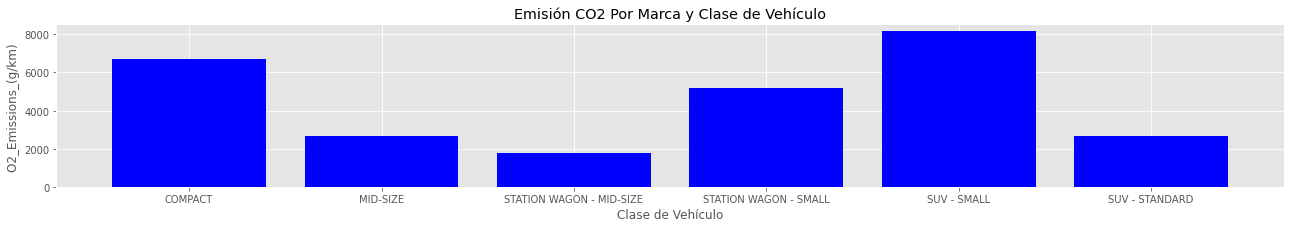

In [25]:
fig1, ax = plt.subplots(figsize=(22,3))
ax.bar(volvo.index,volvo['CO2_Emissions_(g/km)'], color='b')
ax.set_title('Emisión CO2 Por Marca y Clase de Vehículo')
ax.set_ylabel('O2_Emissions_(g/km) ')
ax.set_xlabel('Clase de Vehículo')

En la marca Volvo vemos suv-small y compact lideran las emisiones de CO2

Ahora para BENTLEY

In [26]:
bentley=make2.loc['BENTLEY']
bentley

,CO2_Emissions_(g/km)
Vehicle_Class,
COMPACT,2454
MID-SIZE,5504
SUBCOMPACT,3506
SUV - STANDARD,1086
TWO-SEATER,327


Text(0.5, 0, 'Clase de Vehículo')

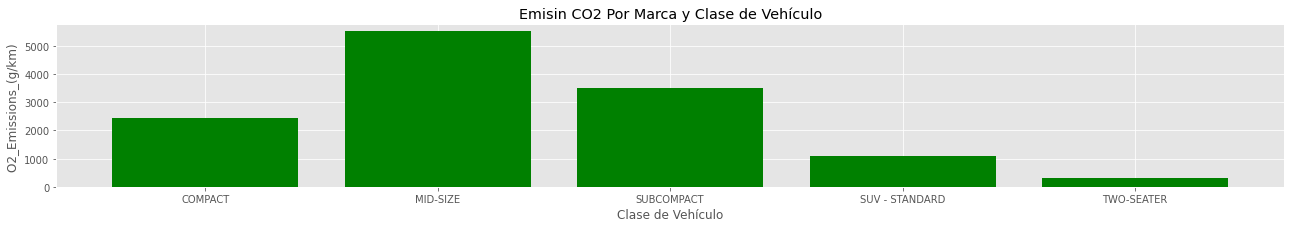

In [27]:
fig1, ax = plt.subplots(figsize=(22,3))
ax.bar(bentley.index,bentley['CO2_Emissions_(g/km)'],color='g')
ax.set_title('Emisin CO2 Por Marca y Clase de Vehículo')
ax.set_ylabel('O2_Emissions_(g/km) ')
ax.set_xlabel('Clase de Vehículo')

En la marca Bentley asoman como clases de mayor emision de CO2 mid-size y subcompact.
Por lo que arrojan las visualizaciones hasta aquí hay dependencia entre las clases de vehiculo, marcas y emisiones de CO2.

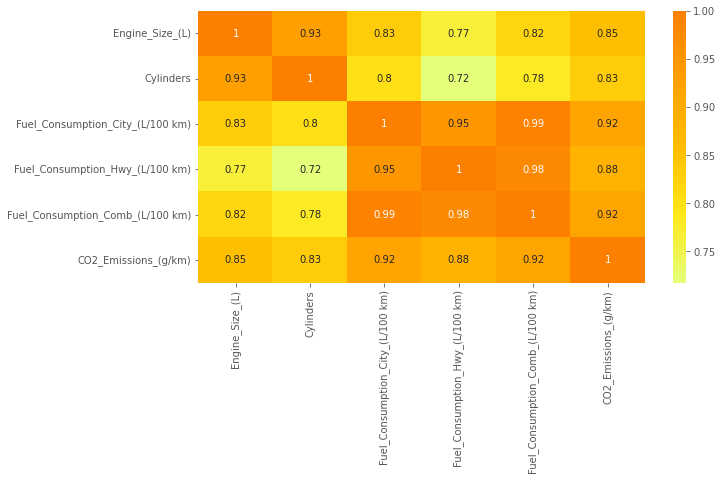

In [29]:
f, ax=plt.subplots(figsize=(10,5))
corr = df.corr()
ax=sns.heatmap(corr, cmap = 'Wistia', annot= True)

Analizamos algunas visualizaciones para ver relaciones entre los tamañanos de motores, transmisiones, cilindradas , los consumos y las emisiones de CO2. Que se ven el en heatmap, ej: los datos de consumo por km, las cilindradas, el tamaño del motor, parecen correlaciones fuertes.

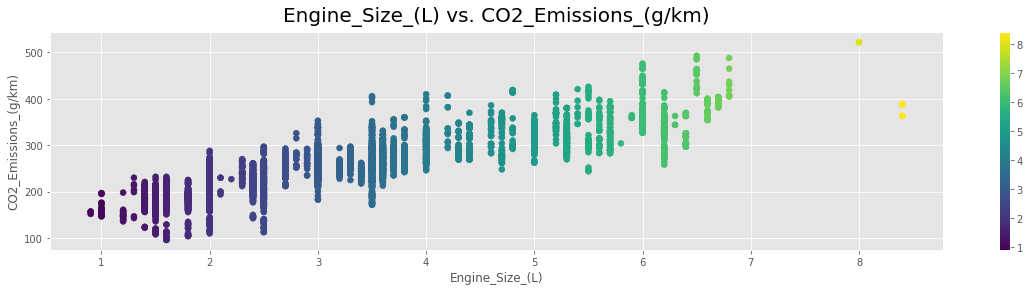

In [30]:
fig, ax= plt.subplots(figsize=(20, 4))
mapeo_colores=plt.scatter(df['Engine_Size_(L)'],df['CO2_Emissions_(g/km)'], c =df['Engine_Size_(L)'])
fig.colorbar(mapeo_colores)
plt.title("Engine_Size_(L) vs. CO2_Emissions_(g/km)", fontsize=20, verticalalignment='bottom');
plt.xlabel("Engine_Size_(L)");
plt.ylabel("CO2_Emissions_(g/km)");

Hay una tendencia que a mayor tamaño de motor mayor generacion de emisiones

Visaulizamos una tendencia que a mayor tamaño de motor mayor consumo de combustible en carretera

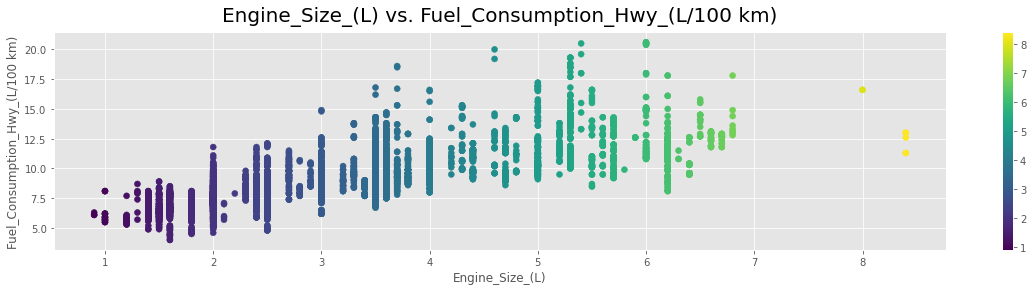

In [31]:
fig, ax= plt.subplots(figsize=(20, 4))
colores=plt.scatter(df['Engine_Size_(L)'],df['Fuel_Consumption_Hwy_(L/100 km)'], c =df['Engine_Size_(L)'])
fig.colorbar(colores)
plt.title("Engine_Size_(L) vs. Fuel_Consumption_Hwy_(L/100 km)", fontsize=20, verticalalignment='bottom');
plt.xlabel("Engine_Size_(L)");
plt.ylabel("Fuel_Consumption_Hwy_(L/100 km)");

Text(0.5, 1.0, 'CO2_Emissions_(g/km) vs Cylinders')

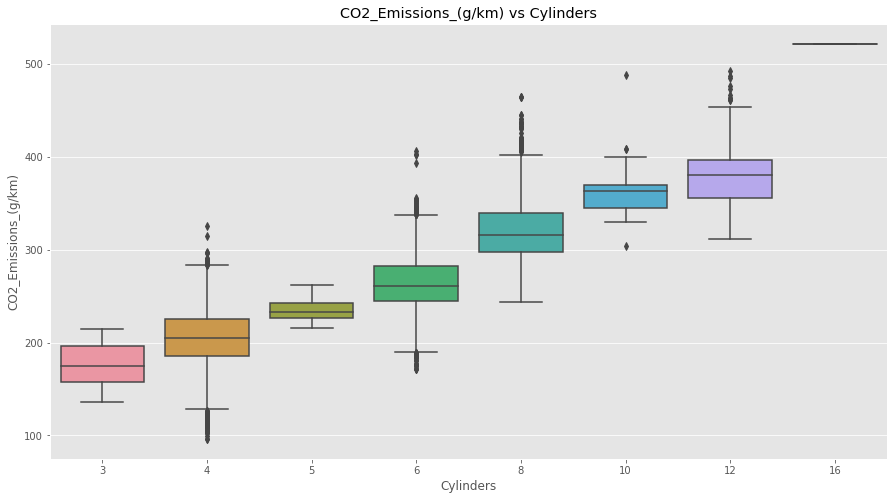

In [32]:
fig, ax= plt.subplots(figsize=(15,8))
sns.boxplot(x='Cylinders', y = 'CO2_Emissions_(g/km)', data = df) 
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
plt.title("CO2_Emissions_(g/km) vs Cylinders")

Se ve tendencia a mayor cilindrada mayores emisiones.
En cilindrada 10 está sesgada a la derecha, qué pasa? Hechamos un vistazo

In [33]:
df.loc[df.Cylinders==10, 'CO2_Emissions_(g/km)'].describe()

count     40.000000
mean     362.600000
std       30.619082
min      304.000000
25%      345.250000
50%      363.500000
75%      370.000000
max      488.000000
Name: CO2_Emissions_(g/km), dtype: float64

Hay alguna marca y modelo de vehículo que emite mucho más CO2 que la media del resto de las marcas y esta generando una distribucion a derecha. El valor máximo esta mucho mas lejano a la media que el valor mínimo.

In [34]:
df.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size_(L)', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City_(L/100 km)',
       'Fuel_Consumption_Hwy_(L/100 km)', 'Fuel_Consumption_Comb_(L/100 km)',
       'CO2_Emissions_(g/km)'],
      dtype='object')

Text(0.5, 1.0, 'CO2_Emissions_(g/km) vs CFuel_Type')

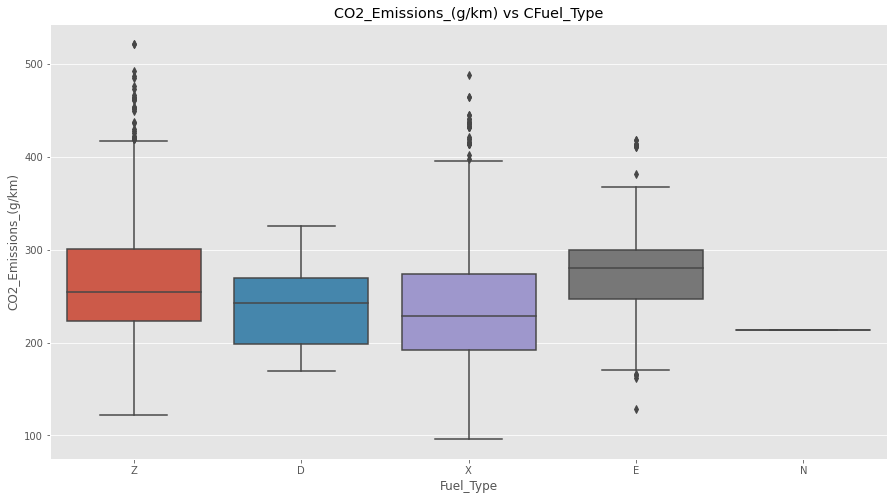

In [35]:
fig, ax= plt.subplots(figsize=(15,8))
sns.boxplot(x='Fuel_Type', y = 'CO2_Emissions_(g/km)', data = df) 
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
plt.title("CO2_Emissions_(g/km) vs CFuel_Type")

Además de los outliers no están muy alejadas las medias de los distintos combustibles respecto de las emisiones de CO2, X y N parecen asomar como menos generadores de emisiones.

In [36]:
df.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size_(L)', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City_(L/100 km)',
       'Fuel_Consumption_Hwy_(L/100 km)', 'Fuel_Consumption_Comb_(L/100 km)',
       'CO2_Emissions_(g/km)'],
      dtype='object')

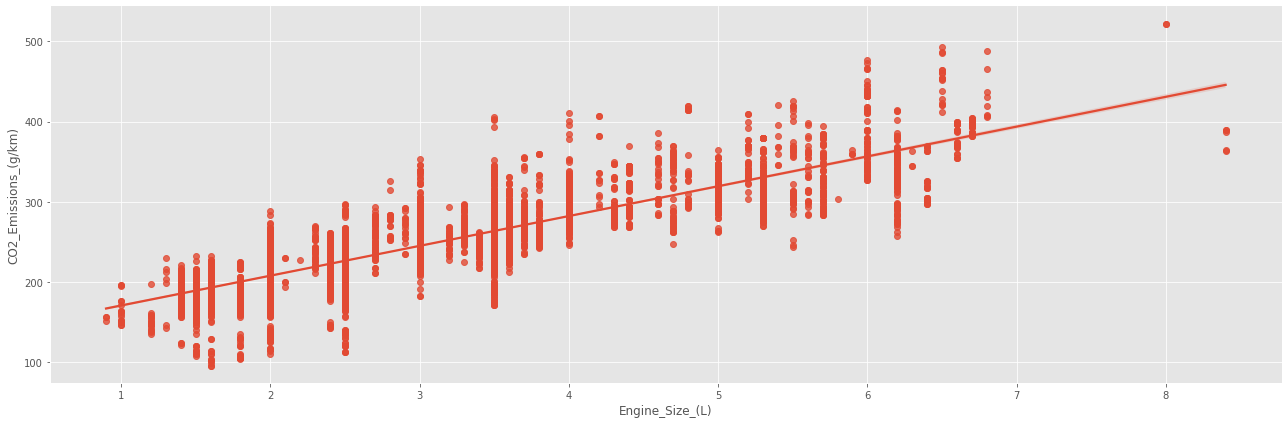

In [37]:
sns.lmplot(x='Engine_Size_(L)',y='CO2_Emissions_(g/km)',data=df,aspect=3,height=6)

Por las visualizaciones realizadas se ven tendencias o correlaciones respecto a la marca, modelos, clase, tamaño motor, cilindrada, etc que influyen en mayor o en menor medida en las emisiones de CO2 de un determinado vehiculo.


#Feature Creation
Trabajamos con df sin variable elimnada previamente Fuel_Consumption_Comb_(mpg)

In [38]:
df['Make'].value_counts() # las variables con baja frecuencia lo vamos a reemplazar por otro y luego label encoder

FORD             577
CHEVROLET        515
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
GMC              289
TOYOTA           276
AUDI             263
NISSAN           213
MINI             200
JEEP             200
KIA              192
VOLKSWAGEN       187
HYUNDAI          184
DODGE            180
HONDA            164
CADILLAC         141
LEXUS            129
MAZDA            127
SUBARU           119
JAGUAR           118
VOLVO            118
BUICK             92
INFINITI          87
LINCOLN           81
LAND ROVER        76
MITSUBISHI        73
RAM               72
CHRYSLER          64
FIAT              56
MASERATI          52
ACURA             51
ROLLS-ROYCE       48
ASTON MARTIN      39
LAMBORGHINI       37
BENTLEY           35
SCION             21
ALFA ROMEO        19
GENESIS           14
SMART              7
SRT                2
BUGATTI            2
Name: Make, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


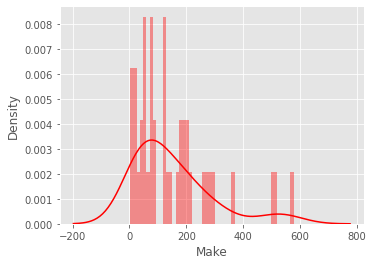

In [39]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['Make'].value_counts(),bins=50,color='r',ax=ax)

In [40]:
df['Model'].value_counts()[0:30] #Variables con frecuencia baja = otro, luego Label encoder 

F-150 FFV        32
F-150 FFV 4X4    31
MUSTANG          27
FOCUS FFV        24
F-150 4X4        20
F-150            19
SONIC 5          18
ATS              18
JETTA            18
COMPASS          18
CAMARO           17
SONIC            17
SIERRA           16
COROLLA          16
ACCORD           16
PATRIOT          16
SILVERADO        16
SILVERADO 4WD    16
TACOMA 4WD       16
SIERRA 4WD       16
PASSAT           15
CHARGER FFV      15
FUSION           15
FORTE 5          15
FORTE KOUP       15
CANYON           14
COLORADO         14
BEETLE           14
ELANTRA          13
CRUZE            13
Name: Model, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


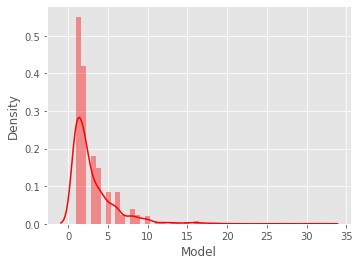

In [41]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['Model'].value_counts(),bins=50,color='r',ax=ax)

In [42]:
df['Vehicle_Class'].value_counts() # Variables con frecuencia cambiamos a otro y luego label encoder. 

SUV - SMALL                 1006
MID-SIZE                     983
COMPACT                      903
SUV - STANDARD               613
SUBCOMPACT                   533
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      475
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        214
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: Vehicle_Class, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


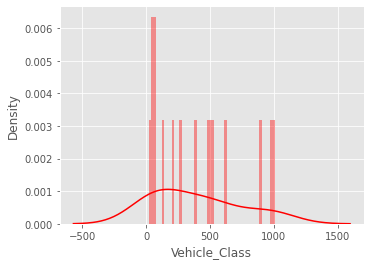

In [43]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['Vehicle_Class'].value_counts(),bins=50,color='r',ax=ax)

In [44]:
df['Fuel_Type'].value_counts() #Frecuencia baja = otro y luego Label encoder

X    3039
Z    2765
E     330
D     147
N       1
Name: Fuel_Type, dtype: int64

In [45]:
df['Transmission'].value_counts() # transformar a otro y label encoder

AS6     1139
AS8     1056
M6       773
A6       684
AM7      383
A8       378
AS7      283
A9       263
AV       241
M5       168
AS10     151
AM6      107
AV7       92
AV6       89
A5        78
M7        78
AS9       65
A4        61
AM8       45
A7        44
AV8       34
A10       28
AS5       26
AV10       9
AM5        4
AS4        2
AM9        1
Name: Transmission, dtype: int64

#Feature Transformacion
Las cinco variables caterogicas para tratar con laber encoder previo transformación de variables de baja frecuencia a 'Otro'. Utilizaremos lista por comprensión.

Reconvertir categorias para hacerlas reducidas y disminuir ruido

In [46]:
df['Make']=[x if x in df['Make'].value_counts()[0:20].index else 'Otro' for x in df['Make']]
df['Model']=[x if x in df['Model'].value_counts()[0:10].index else 'Otro' for x in df['Model']]
df['Vehicle_Class']=[x if x in df['Vehicle_Class'].value_counts()[0:10].index else 'Otro' for x in df['Vehicle_Class']]
df['Fuel_Type']=[x if x in df['Fuel_Type'].value_counts()[0:4].index else 'Otro' for x in df['Fuel_Type']]
df['Transmission']=[x if x in df['Transmission'].value_counts()[0:12].index else 'Otro' for x in df['Transmission']]
df.head()

,Make,Model,Vehicle_Class,Engine_Size_(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_(L/100 km),Fuel_Consumption_Hwy_(L/100 km),Fuel_Consumption_Comb_(L/100 km),CO2_Emissions_(g/km)
0,Otro,Otro,COMPACT,2.0,4,Otro,Z,9.9,6.7,8.5,196
1,Otro,Otro,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,Otro,Otro,COMPACT,1.5,4,Otro,Z,6.0,5.8,5.9,136
3,Otro,Otro,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,Otro,Otro,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


#Label Encoder

In [47]:
from sklearn.preprocessing import LabelEncoder
LE=['Make','Model','Vehicle_Class','Fuel_Type','Transmission']
le= LabelEncoder()
df[LE]=df[LE].apply(le.fit_transform)
df.head()

,Make,Model,Vehicle_Class,Engine_Size_(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_(L/100 km),Fuel_Consumption_Hwy_(L/100 km),Fuel_Consumption_Comb_(L/100 km),CO2_Emissions_(g/km)
0,16,9,0,2.0,4,12,4,9.9,6.7,8.5,196
1,16,9,0,2.4,4,11,4,11.2,7.7,9.6,221
2,16,9,0,1.5,4,12,4,6.0,5.8,5.9,136
3,16,9,8,3.5,6,6,4,12.7,9.1,11.1,255
4,16,9,8,3.5,6,6,4,12.1,8.7,10.6,244


In [48]:
df.shape

(6282, 11)

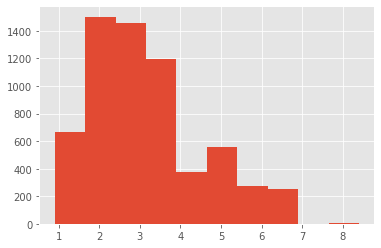

In [49]:
fig1=plt.hist(df['Engine_Size_(L)'])

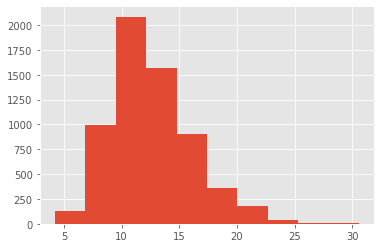

In [50]:
fig1=plt.hist(df['Fuel_Consumption_City_(L/100 km)'])

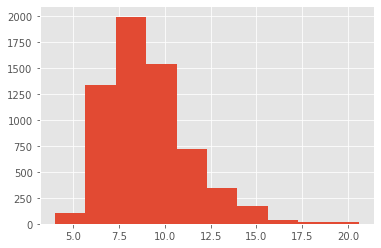

In [51]:
fig1=plt.hist(df['Fuel_Consumption_Hwy_(L/100 km)'])

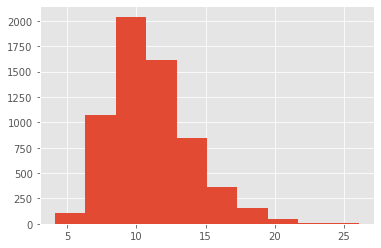

In [52]:
fig1=plt.hist(df['Fuel_Consumption_Comb_(L/100 km)'])

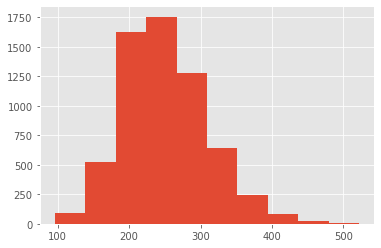

In [53]:
fig1=plt.hist(df['CO2_Emissions_(g/km)'])

Todas las graficas muestran sesgo a la derecha.
Realizo un Standard Escaler para generar una mejor distribución de las variables a fin de tratar que los algoritmos que aplique a futuro no den errores grandes y por ende sus estimadores. Para evitar desestabilizar el sistema.

In [54]:
from numpy.ma.core import ptp
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method='yeo-johnson')
col_num=['Engine_Size_(L)','Fuel_Consumption_City_(L/100 km)','Fuel_Consumption_Hwy_(L/100 km)','Fuel_Consumption_Comb_(L/100 km)','CO2_Emissions_(g/km)']
df[col_num]=pt.fit_transform(df[col_num])
df.head()

,Make,Model,Vehicle_Class,Engine_Size_(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_(L/100 km),Fuel_Consumption_Hwy_(L/100 km),Fuel_Consumption_Comb_(L/100 km),CO2_Emissions_(g/km)
0,16,9,0,-0.878738,4,12,4,-0.740042,-1.181627,-0.867418,-0.934666
1,16,9,0,-0.430526,4,11,4,-0.303784,-0.537093,-0.391884,-0.446082
2,16,9,0,-1.583024,4,12,4,-2.431850,-1.888270,-2.310802,-2.339738
3,16,9,8,0.478597,6,6,4,0.147690,0.188851,0.170059,0.154611
4,16,9,8,0.478597,6,6,4,-0.026969,-0.001354,-0.007649,-0.032641


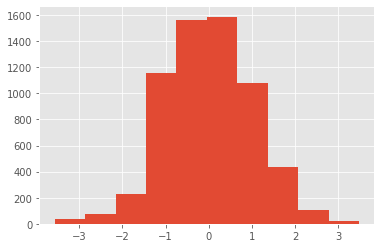

In [55]:
fig1=plt.hist(df['CO2_Emissions_(g/km)'])

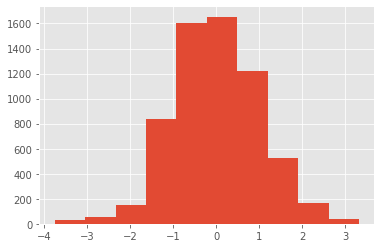

In [56]:
fig1=plt.hist(df['Fuel_Consumption_Comb_(L/100 km)'])

Se observa que con el power transformer mejora notablemente la distribucion.

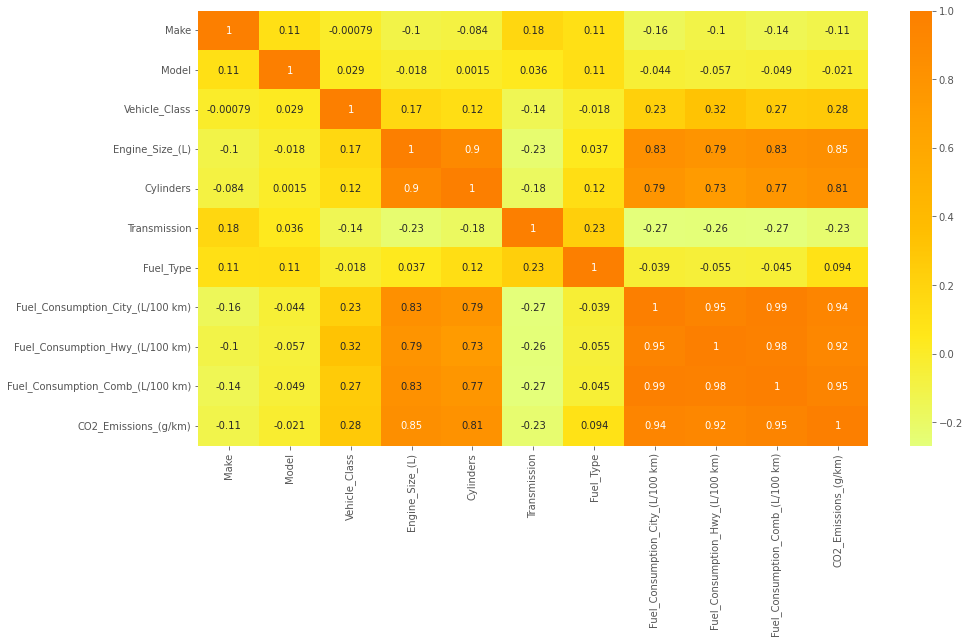

In [58]:
f, ax=plt.subplots(figsize=(15,8))
corr = df.corr()
ax=sns.heatmap(corr, cmap = 'Wistia', annot= True)

Con las trnasformaciones reliazadas, hay variables que mejoraron sus correlaciones respecto del heatmap con el df original y este transformado de 0.92 a 0.94; 0.88 a 0.92 y 0.92 a 0.95. 

# Data Wrangling
Para seleccionar o descartar las variables que mas o menos afecten a la variable objetivo. En este caso será Aprenidzaje supervisado, ya que tenemos variable target y = CO2_Emissions_(g/km). Las otra 10 variables, ahora todas numericas, serán la matriz de entrada x.

Seleccion de variables Forward selection

Definimos x e y

In [ ]:
x = df.drop("CO2_Emissions_(g/km)", 1)       
y = df['CO2_Emissions_(g/km)']
x

<ipython-input-58-0d211ad0b62f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df.drop("CO2_Emissions_(g/km)", 1)


,Make,Model,Vehicle_Class,Engine_Size_(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_(L/100 km),Fuel_Consumption_Hwy_(L/100 km),Fuel_Consumption_Comb_(L/100 km)
0,16,9,0,-0.878738,4,12,4,-0.740042,-1.181627,-0.867418
1,16,9,0,-0.430526,4,11,4,-0.303784,-0.537093,-0.391884
2,16,9,0,-1.583024,4,12,4,-2.431850,-1.888270,-2.310802
3,16,9,8,0.478597,6,6,4,0.147690,0.188851,0.170059
4,16,9,8,0.478597,6,6,4,-0.026969,-0.001354,-0.007649
...,...,...,...,...,...,...,...,...,...,...
7380,16,9,8,-0.878738,4,8,4,-0.466089,-0.537093,-0.473880
7381,16,9,8,-0.878738,4,8,4,-0.303784,-0.204556,-0.272259
7382,16,9,8,-0.878738,4,8,4,-0.147690,-0.050881,-0.118678
7383,16,9,9,-0.878738,4,8,4,-0.303784,-0.204556,-0.272259


In [ ]:
x.head(5)

,Make,Model,Vehicle_Class,Engine_Size_(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_(L/100 km),Fuel_Consumption_Hwy_(L/100 km),Fuel_Consumption_Comb_(L/100 km)
0,16,9,0,-0.878738,4,12,4,-0.740042,-1.181627,-0.867418
1,16,9,0,-0.430526,4,11,4,-0.303784,-0.537093,-0.391884
2,16,9,0,-1.583024,4,12,4,-2.431850,-1.888270,-2.310802
3,16,9,8,0.478597,6,6,4,0.147690,0.188851,0.170059
4,16,9,8,0.478597,6,6,4,-0.026969,-0.001354,-0.007649


In [ ]:
x.shape

(6282, 10)

In [ ]:
y.head(5)

0   -0.934666
1   -0.446082
2   -2.339738
3    0.154611
4   -0.032641
Name: CO2_Emissions_(g/km), dtype: float64

In [ ]:
import statsmodels.api as sm
def forward_selection(data=x, target= y, significance_level=0.05):
    initial_features = x.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(data=x,target=y,significance_level=0.05)

<ipython-input-63-a6e4635b1357>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-63-a6e4635b1357>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-63-a6e4635b1357>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-63-a6e4635b1357>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['Engine_Size_(L)',
 'Fuel_Consumption_Hwy_(L/100 km)',
 'Fuel_Consumption_Comb_(L/100 km)',
 'Fuel_Type',
 'Cylinders',
 'Vehicle_Class',
 'Fuel_Consumption_City_(L/100 km)']

De 10 variables independientes o columnas quedaron 7. 
Se determina que las columnas: Model, Make, Transmission, no tienen impacto significativo o menos que las demas variables sobre la variable target.

Reajusto la matriz x eliminando las no seleccionadas

In [ ]:
x1 = x.drop(columns=['Model','Make','Transmission'])
x1

,Vehicle_Class,Engine_Size_(L),Cylinders,Fuel_Type,Fuel_Consumption_City_(L/100 km),Fuel_Consumption_Hwy_(L/100 km),Fuel_Consumption_Comb_(L/100 km)
0,0,-0.878738,4,4,-0.740042,-1.181627,-0.867418
1,0,-0.430526,4,4,-0.303784,-0.537093,-0.391884
2,0,-1.583024,4,4,-2.431850,-1.888270,-2.310802
3,8,0.478597,6,4,0.147690,0.188851,0.170059
4,8,0.478597,6,4,-0.026969,-0.001354,-0.007649
...,...,...,...,...,...,...,...
7380,8,-0.878738,4,4,-0.466089,-0.537093,-0.473880
7381,8,-0.878738,4,4,-0.303784,-0.204556,-0.272259
7382,8,-0.878738,4,4,-0.147690,-0.050881,-0.118678
7383,9,-0.878738,4,4,-0.303784,-0.204556,-0.272259


#Selección del algoritmo
Implementamos modelo de regresión lineal, aprendizaje supervisado.


Vamos directo con todas las variables y la variable etiqueta

In [ ]:
model1 = 'y~x1'
lm1   = smf.ols(formula = model1, data = df).fit()
pred=lm1.predict(x1)
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.174e+04
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:43:40   Log-Likelihood:                -603.59
No. Observations:                6282   AIC:                             1223.
Df Residuals:                    6274   BIC:                             1277.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8506      0.026    -32.118      0.0

Los Pvalor son pequeños entonces son significativos.
El r2 0.929 es muy bueno. 

#Validación del Modelo

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3.850186998610922e-15


Text(0.5, 1.0, 'Normalidad de residuales & media: \n Error residual')

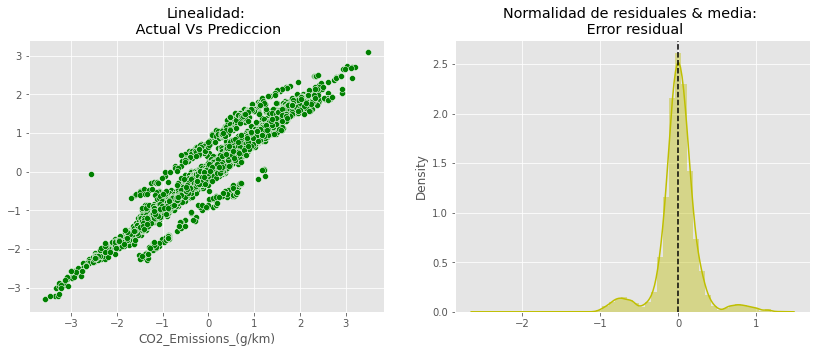

In [ ]:
# Chequeamos linealidad
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y,pred,ax=ax,color='g')
ax.set_title('Linealidad:\n Actual Vs Prediccion')

# Chequeamos normalidad y promedio
ax = f.add_subplot(122)
sns.distplot((y - pred),ax=ax,color='y')
ax.axvline((y - pred).mean(),color='k',linestyle='--')
print((y - pred).mean())
ax.set_title('Normalidad de residuales & media: \n Error residual')

Text(0.5, 1.0, 'Homocedasticidad: \nResiduales Vs Predichos')

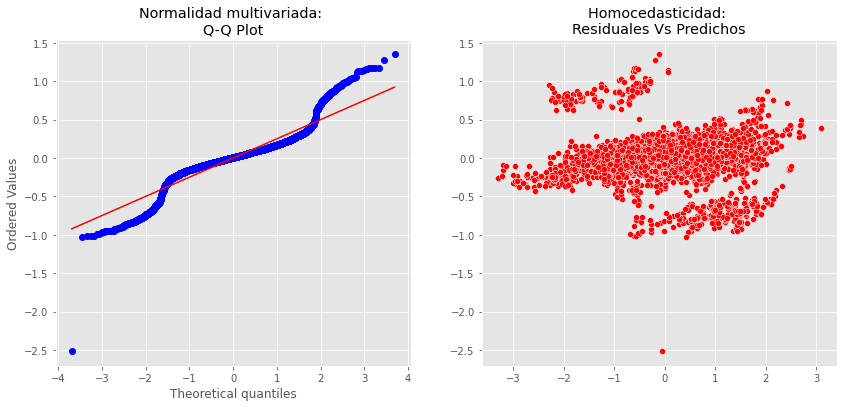

In [ ]:
# Normalidad multivariada
# Q-Q plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y - pred),fit=True,plot=ax[0])
ax[0].set_title('Normalidad multivariada: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y - pred), x= pred, ax = ax[1],color='r') 
ax[1].set_title('Homocedasticidad: \nResiduales Vs Predichos')

Se ve en los gráficos que se cumplen la independencia, homocedasticidad y normalidad.

In [ ]:
lm1.rsquared

0.9290451318440172

In [ ]:
# Multicolinealidad
#Variance Inflation Factor
VIF = 1/(1- lm1.rsquared)
VIF

14.093465691482383

En nuestro modelo, la gráfica datos reales vs predicicones es una recta, por lo que la suposición lineal es correcta
La media residual es cero y el gráfico no está sesgado.
El gráfico Q-Q muestra valores inferior a 1.5
Hay homocedasticidad.
El VIF de varianza es bajo, por lo que no hay multicolinealidad.

#Metricas para validar modelo

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(x_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(x_test)
y_pred

array([ 0.02443256,  0.13845759,  0.63713373, ...,  0.88231629,
       -1.04240329, -0.89083985])

In [ ]:
y_test

3003    1.178114
5970   -0.067379
2394    0.861703
6020    0.479786
3416   -0.015354
          ...   
6249   -0.914232
2571   -0.464791
3162    0.905876
2459   -0.955179
7210   -0.975773
Name: CO2_Emissions_(g/km), Length: 1257, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE es:', mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred))
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))
from sklearn.metrics import median_absolute_error
print('MedAE es:', median_absolute_error(y_true=y_test, y_pred=y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
from sklearn.metrics import max_error
print('MaxError es:', max_error(y_true=y_test, y_pred=y_pred))
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print('R2 es:',r2)
print('Max, Min, Mean:',y.max(),y.min(), y.mean())

MAE 0.17911870962564116
MAPE es: 1.0589305119285934
MSE 0.08055889711628066
MedAE es: 0.1056509891145262
RMSE 0.283828992733795
MaxError es: 1.153681131126459
R2 es: 0.9205846871699223
Max, Min, Mean: 3.483628747235835 -3.570203794273385 1.5145124533313819e-15


Por los valores de MAE, MSE, RMSE(sqrt y log) y R2 el modelo funciona. R2 = 0.929 del OLS Regression Results se puede decir que el 92.9% de la variabilidad de Y es explicada por x. Y  entre el y_test e y_pred se explica en un 92,05%.
Podría predecir con nuevos valores de entrada las posibles emisiones de CO2.
Con lo que se podría ajustar los diseños de las marcas sus modelos y clases de vehiculos así como tamañano de motor, transmision, etc..



#Cross validation
K-Fold
Para ver si no estan produciendo errores por la selección aleatoria de los datos de test.

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from numpy import mean
from numpy import std

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
# crear el modelo
model = RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)
scores = cross_val_score(model, x1, y, cv=7, verbose=1,scoring='r2')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s finished


In [ ]:
print("%0.2f de r2 promedio con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))

0.96 de r2 promedio con una desviacion estandar de 0.01


Esta validacion cruzada da un r2: 0.963 mejor que las validaciones anteriores (0,92 y 0.929) El modelo esta funcionando bien.

#Aplicamos un segundo algoritmo

In [ ]:
import xgboost as xg

In [ ]:
# Modelo base
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 100, seed = 42, max_depth=10, eta=0.01, 
                        subsample=0.7, colsample_bytree=0.8)
# Ajustar rl modelo
xgb_r.fit(x_train, y_train)

XGBRegressor(colsample_bytree=0.8, eta=0.01, max_depth=10,
             objective='reg:squarederror', seed=42, subsample=0.7)

In [ ]:
y_pred=xgb_r.predict(x_test)
y_pred

array([ 1.1826572 , -0.07483852,  0.81381834, ...,  0.8436357 ,
       -1.0222821 , -0.96057475], dtype=float32)

In [ ]:
y_test

3003    1.178114
5970   -0.067379
2394    0.861703
6020    0.479786
3416   -0.015354
          ...   
6249   -0.914232
2571   -0.464791
3162    0.905876
2459   -0.955179
7210   -0.975773
Name: CO2_Emissions_(g/km), Length: 1257, dtype: float64

#Validación de nuevo modelo

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))
print('MAPE es:', mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print('MedAE es:', median_absolute_error(y_true=y_test, y_pred=y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print('MaxError es:', max_error(y_true=y_test, y_pred=y_pred))
print('R2 es:',r2)
print('Max, Min, Mean:',y.max(),y.min(), y.mean())

MAE 0.0359706938919652
MAPE es: 0.23942724025391582
MSE 0.0042093396120256085
MedAE es: 0.025866270485460086
RMSE 0.06487942364128714
MaxError es: 1.3436457121938314
R2 es: 0.9205846871699223
Max, Min, Mean: 3.483628747235835 -3.570203794273385 1.5145124533313819e-15


#Conclusiones y objetivos a futuro

El r2 de modelo OLS Regression es mejor que el de Xgboost regresor. Seleccionamos el OLS Regression para predecir.

El objetivo a futuro será implementar las técnicas vistas en clase para generar un modelo que nos ayude a predecir quizás un poco mejor que el OLS rEGRESSION que partes mecánicas deben mejorar su perfomarmance para reducir las emisiones de CO2. Ese modelo será puesto a prueba usando en principio un grupo de test del mismo dataset, y si obtenermos resultados con un buen accuracy, podriamos implementarlo a futuro con otro dataset, por ejemplo, nuevas medicions de las marcas evaluadas; siempre evaluando que no existan nuevos factores que pudieran afectar la predicción. De haber cambios, se deben introducir nuevas variables en el modelo.

Outliers no fueron trabajados, en proxima mejora del modelo se los puede eliminar que no es recomendable o tratar de incluirlos con algún método de que los incluya dentro de los cuartiles.

Quizas se podría transformar la variable target en categorica, diciendo que 
CO2_Emissions_(g/km) > z es muy contaminante y CO2_Emissions_(g/km)<= z es poco contaminante, entonces podemos usar modelos de clasificacion. O también considerar todo el data set como matriz x sin variable target y usar metods de clustering. Hay que trabajar más.